# Example

The following code snippet visually demonstrates the operation of the GIF algorithm. The code has been slightly modified from `scikit-learn`'s example of the original Isolation Forest algorithm.

In [1]:
import numpy as np
from genif import GeneralizedIsolationForest
import matplotlib.pyplot as plt

We will generate some data first:

In [2]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

We can now define a function, which will fit classifiers with random parameters and plot prediction results into given matplotlib axes:

In [3]:
def run(ax, prng):
    # Fit the model.
    clf = GeneralizedIsolationForest(k=prng.integers(5, 10), 
                                     n_models=prng.integers(50, 100), 
                                     sample_size=512, 
                                     kernel="rbf", kernel_scaling=np.repeat(0.01, 1), 
                                     sigma=0.01, seed=42)
    clf.fit(X_train)
    
    # Create mesh grid and find probability values for every point in the grid.
    xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create the accompanying plot.
    cf = ax.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    plt.colorbar(cf, ax=ax)

    ax.scatter(X_train[:, 0], X_train[:, 1], s=20, c="w", edgecolor='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], s=20, c="w", edgecolor='k')
    ax.scatter(X_outliers[:, 0], X_outliers[:, 1], c="w", s=20, edgecolor='k')

    ax.axis('tight')
    
    return clf

Let's run the function like that, plotting the result of three different classifiers into a scatter plot:

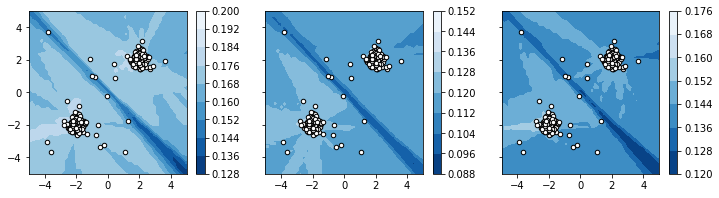

In [4]:
rng = np.random.default_rng(seed=42)
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
clfs = [run(ax, rng) for ax in axs]
plt.show()

As you can see, "brighter" areas are associated with higher probability values indicating normal portions of the data space. Conversely, "darker" areas are associated with lower probability values, indicating anomalous data regions.

## Binarization

From the given plots, we may now derive appropriate thresholds, which may be used to derive binary labels from the classifier. We will manually pick some "good" thresholds and demonstrate, how it affects the classification in the plot:

In [5]:
def binarize(ax, clf, threshold):
    # Create mesh grid and find probability values for every point in the grid.
    xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
    bin_df = lambda prob: 1 if prob > threshold else -1
    Z = np.vectorize(bin_df)(clf.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Create the accompanying plot.
    cf = ax.contourf(xx, yy, Z, cmap=plt.cm.viridis)
    plt.colorbar(cf, ax=ax)

    ax.scatter(X_train[:, 0], X_train[:, 1], s=1, c="w", edgecolor='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], s=1, c="w", edgecolor='k')
    ax.scatter(X_outliers[:, 0], X_outliers[:, 1], c="w", s=1, edgecolor='k')

    ax.axis('tight')

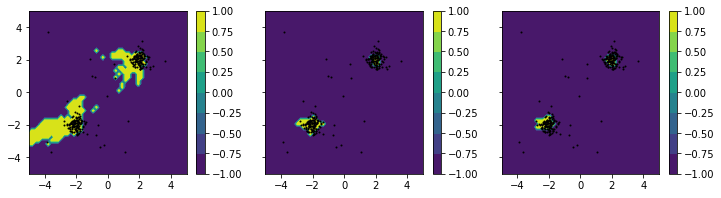

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
thresholds = [0.175, 0.1275, 0.155]
plts = [binarize(ax, clf, t) for ax, clf, t in zip(axs, clfs, thresholds)]